## Explore Separated Orders

This notebook calls simrecon with the saveprefiltered name set.  This will result in the separated orders being saved to disk.  They are then reloaded and visualized.

In [41]:
import mrc as Mrc
from scipy.fftpack import fftn, fftshift
import numpy as np
from tnia.plotting.projections import show_xyz_slice
import os
import sys 

computer = 'bnort'

if computer == 'default':
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks')
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks\Scripts')
elif computer == 'bnort':
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts\Scripts')
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts')
else:
    pass

from simrecon_utils import simrecon

In [42]:
home = r'D:\Janelia\Data 2024-06-12'
input_name = os.path.join(home, r'rois_1\roi_128.mrc')
otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
output_name = os.path.join(home, r'rois_1\roi_128_output.mrc')
separated_name = os.path.join(home, r'rois_1\roi_128_separated.mrc')
restored_name = os.path.join(home, r'rois_1\roi_64_proc_gApo_0.2_supRbase_1_w_0.001.mrc')

In [43]:
sim_kwargs = dict(
                    nphases=5,
                    ndirs=3,
                    angle0= 1.29,
                    negDangle=True,              
                    na= 0.85,
                    nimm= 1.0,
                    zoomfact= 2.0, 
                    background= 100.0,           
                    wiener= 0.001,
                    fastSIM=True,
                    otfRA= True,
                    dampenOrder0=True,
                    k0searchall=True,
                    equalizez=True,
                    preciseapo=True,
                    gammaApo=0.3,
                    suppressR=1.5,
                    nthreads = 8,
                    input_file= input_name,
                    output_file = output_name, 
                    otf_file = otf_name,
                    saveprefiltered = separated_name
                )

In [44]:

sim_output = simrecon(**sim_kwargs)

In [45]:

sep = Mrc.Mrc(separated_name)
sep = sep.data
restored = Mrc.Mrc(restored_name)
restored = restored.data

In [51]:
print(sep.shape, sep.dtype)
dirs = 3
phases = 5
nz = int(sep.shape[0]/dirs/phases)

(975, 128, 65) >c8


In [58]:
n=1
band1 = sep[n*nz:(n+1)*nz,:,:]
band1[0,0,1]
#band1[0,0,1]

(-0.03158792+0.0124783795j)

## Plot separated 3D power spectrum

(65, 128, 65)
(65, 128, 65)


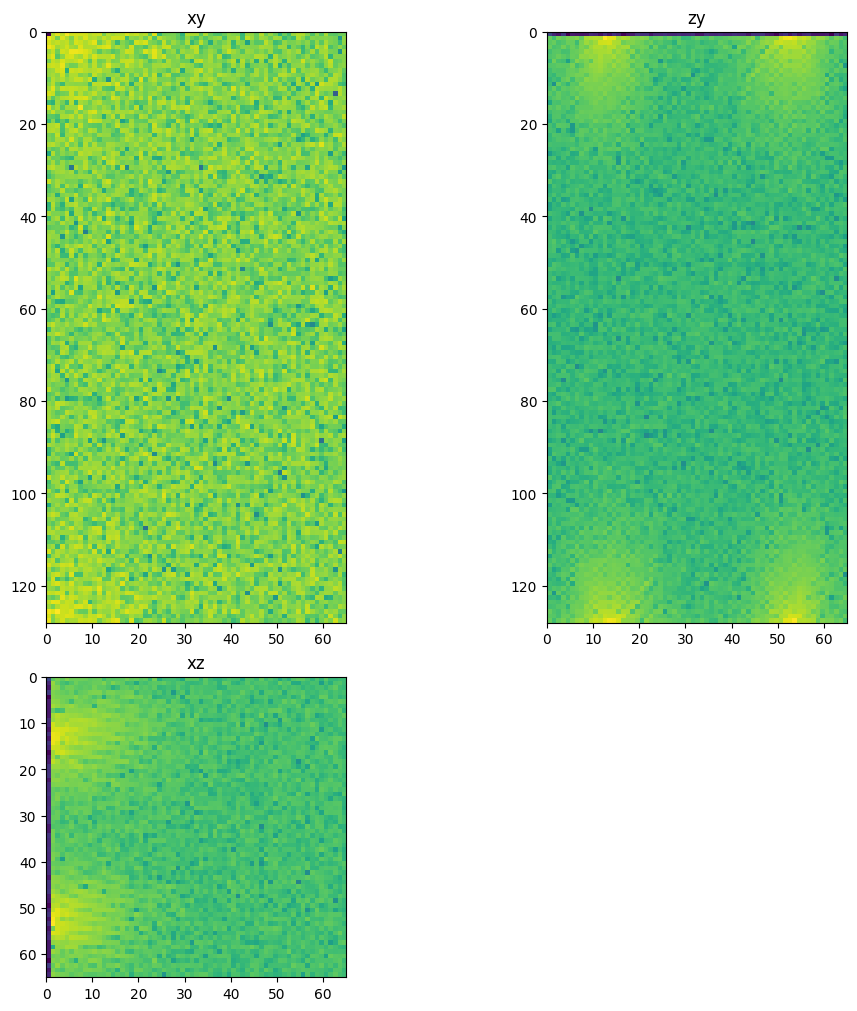

In [9]:
n=2
band1 = sep[n*nz:(n+1)*nz,:,:]

print(band1.shape)
print(band1.shape)
band1 = np.abs(band1)**2
band1 = np.log(band1)

zc, yc, xc = band1.shape[0]//2, band1.shape[1]//2, band1.shape[2]//2
fig = show_xyz_slice(band1, 0, 0, 0) 


## Plot separated centered 3D power spectrum

(65, 128, 65)


(65, 128, 128)
(65, 128, 65)
(65, 128, 128)
(65, 128, 65)
(65, 128, 128)


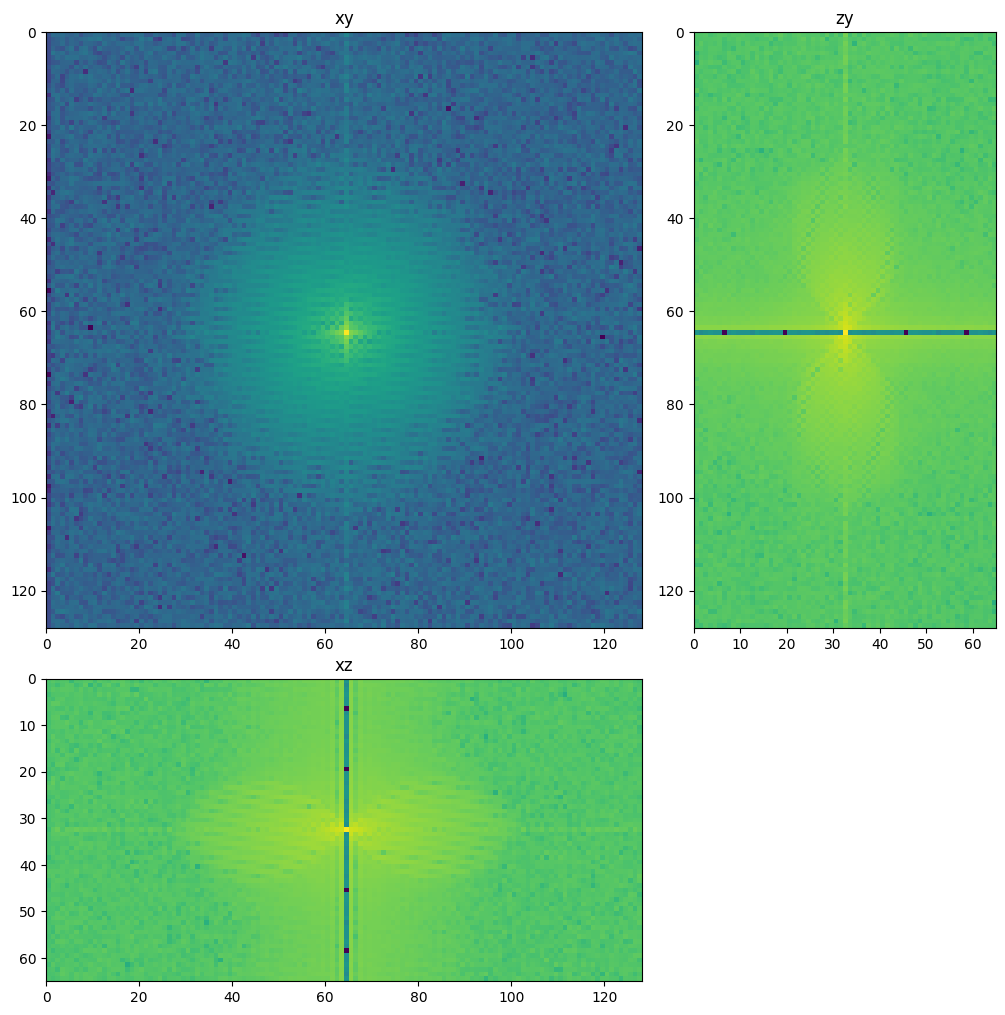

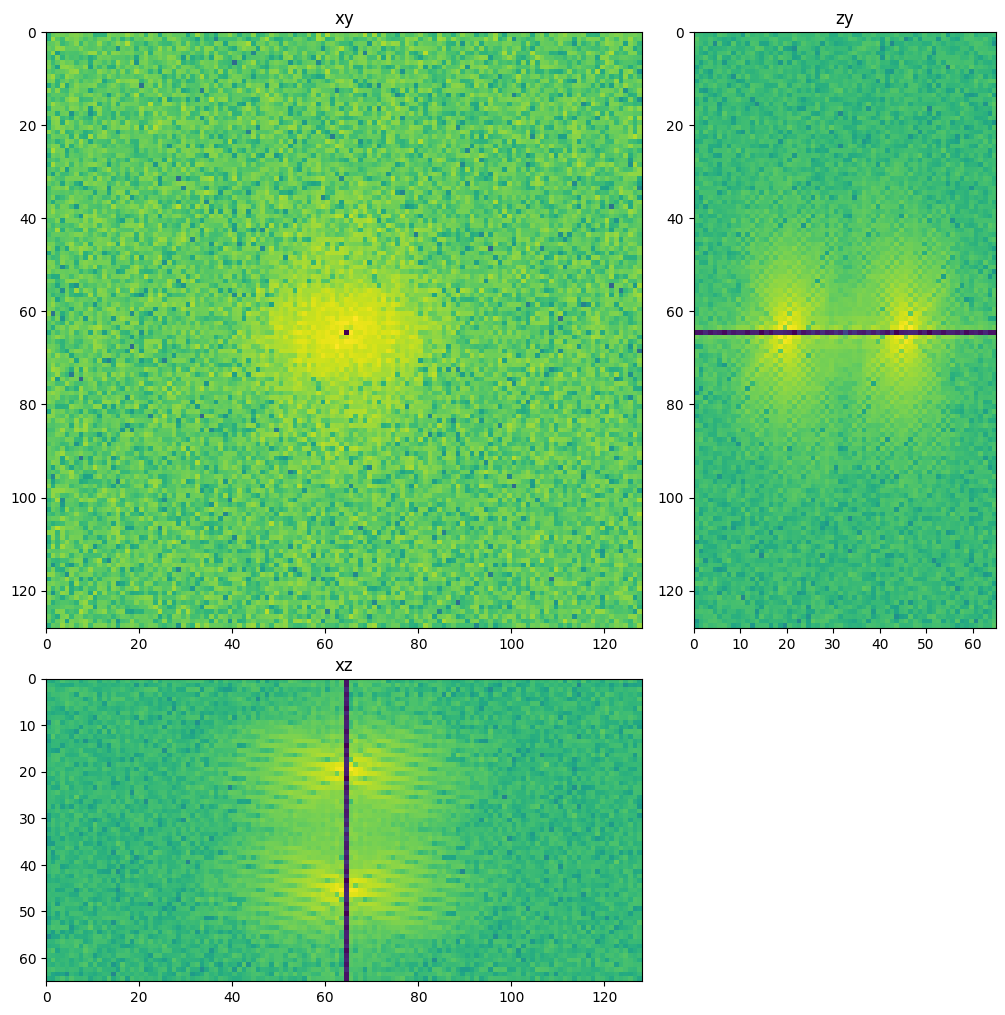

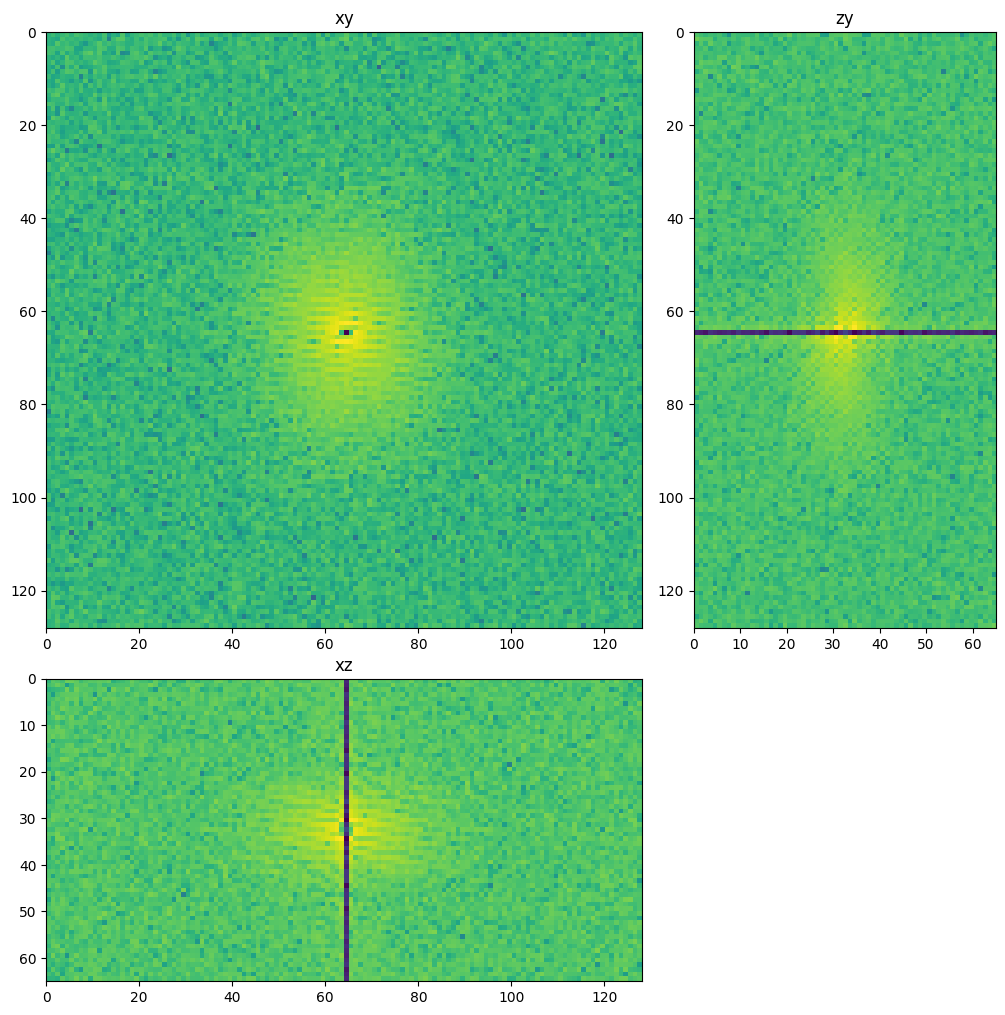

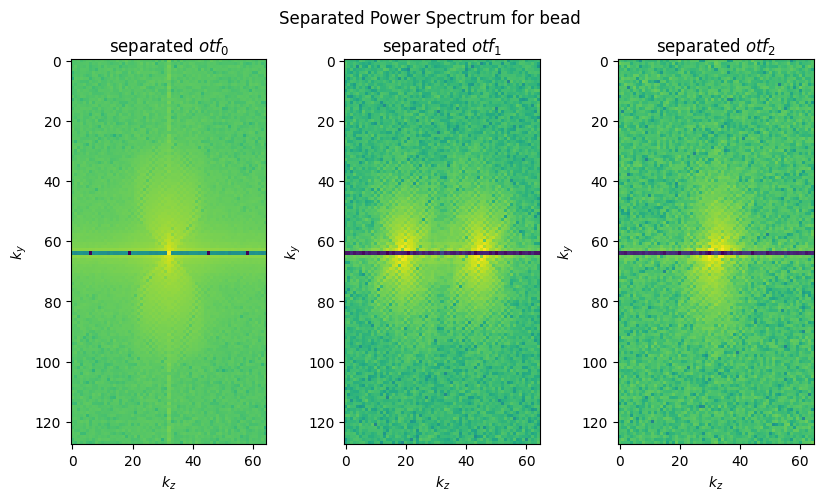

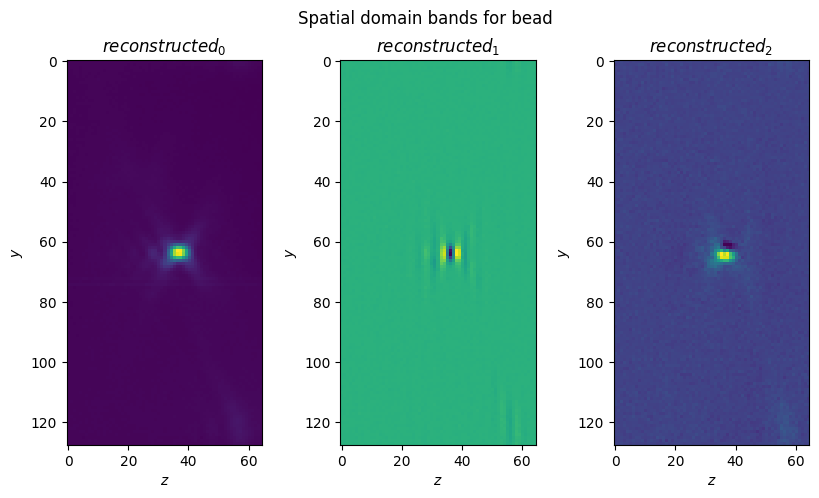

In [59]:
from tnia.plotting.plt_helper import imshow_multi2d

zy_slice_bands = []
xy_slice_reconstructed = []
ns=[0, 1, 3]
for n in ns:
    band = sep[n*nz:(n+1)*nz,:,:]
    print(band.shape)

    original_shape = (65, 128, 128)

    # Perform the inverse FFT to reconstruct the original data
    reconstructed_data = np.fft.irfftn(band, s=original_shape)
    band = np.fft.fftn(reconstructed_data)
    print(band.shape)

    band = fftshift(band)
    band = np.abs(band)**2
    band = np.log(band)

    zc, yc, xc = band.shape[0]//2, band.shape[1]//2, band.shape[2]//2
    
    zy_slice_bands.append(np.transpose(band[:, :, xc]))
    xy_slice_reconstructed.append(np.transpose(reconstructed_data[:,:,xc]))
    
    fig = show_xyz_slice(band, xc, yc, zc) 

fig = imshow_multi2d(zy_slice_bands, [f'separated $otf_0$', f'separated $otf_1$', f'separated $otf_2$'], 1, 3, xlabels = [f'$k_z$', '$k_z$', '$k_z$'], ylabels = [f'$k_y$', '$k_y$', '$k_y$'], height=5)
fig.suptitle('Separated Power Spectrum for bead')
fig.savefig(r'D:\Janelia\Data 2024-06-12\band_figures\separated_bands_bead.png')
fig = imshow_multi2d(xy_slice_reconstructed, [f'$reconstructed_0$', f'$reconstructed_1$', f'$reconstructed_2$'], 1, 3, xlabels = [f'$z$', '$z$', '$z$'], ylabels = [f'$y$', '$y$', '$y$'], height=5)
fig.suptitle('Spatial domain bands for bead')
fig.savefig(r'D:\Janelia\Data 2024-06-12\band_figures\spatial_domain_bands_bead.png')

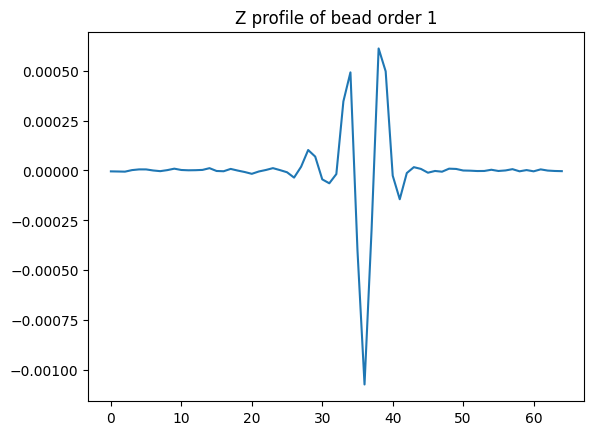

In [21]:
import matplotlib.pyplot as plt
array = xy_slice_reconstructed[1]

# Find the index of the maximum value in the flattened array
max_index_flat = np.argmax(array)

# Convert the flat index to a tuple of indices
max_index = np.unravel_index(max_index_flat, array.shape)

z_profile = array[max_index[0], :]
z_profile_restored = restored[max_index[0], :]

plt.plot(z_profile)
plt.title('Z profile of bead order 1')

plt.savefig(r'D:\Janelia\Data 2024-06-12\band_figures\z_profile_bead_order_1.png')




In [57]:
print(reconstructed_data.min(), reconstructed_data.max(), reconstructed_data.mean())
print(reconstructed_data.sum())

-0.0007503565584591825 0.0006683460000285348 -2.5186007126048058e-12
-2.682209014895614e-06


-0.0007503565584591825 0.0006683460000285348

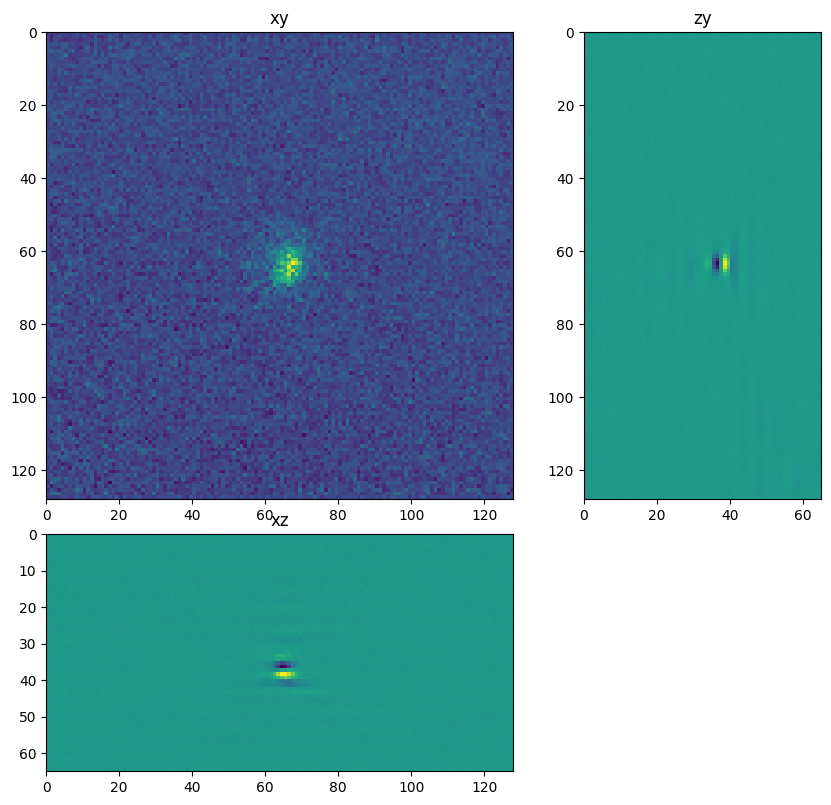

In [58]:
reconstructed_data.shape
print(reconstructed_data.min(), reconstructed_data.max())
fig = show_xyz_slice(reconstructed_data, xc, yc, zc)

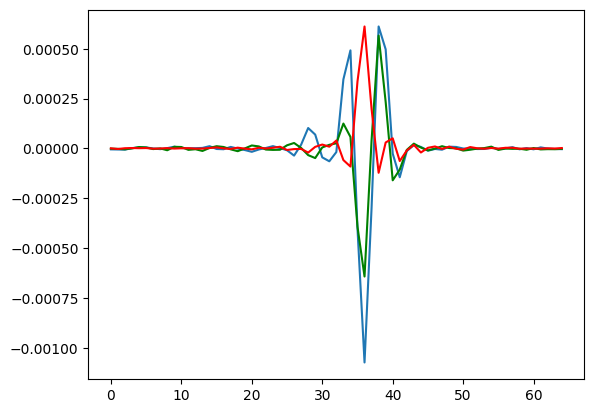

In [40]:
# draw line profile through the center
from calendar import c
import matplotlib.pyplot as plt
xz_1 = xy_slice_reconstructed[1][yc, :]
xz_2 = xy_slice_reconstructed[2][yc, :]

xz_restored = restored[:, yc, xc].copy()
xz_restored = xz_restored * xz_1.max()/xz_restored.max()


plt.plot(xz_1)
plt.plot(xz_2, color='green')
plt.plot(xz_restored, color='red')


In [8]:
import napari
viewer = napari.Viewer()
viewer.add_image(reconstructed_data)

Invalid schema for package 'napari-easy-augment-batch-dl', please run 'npe2 validate napari-easy-augment-batch-dl' to check for manifest errors.
Invalid schema for package 'napari-easy-augment-batch-dl', please run 'npe2 validate napari-easy-augment-batch-dl' to check for manifest errors.


<Image layer 'reconstructed_data' at 0x1a4f31a9e20>

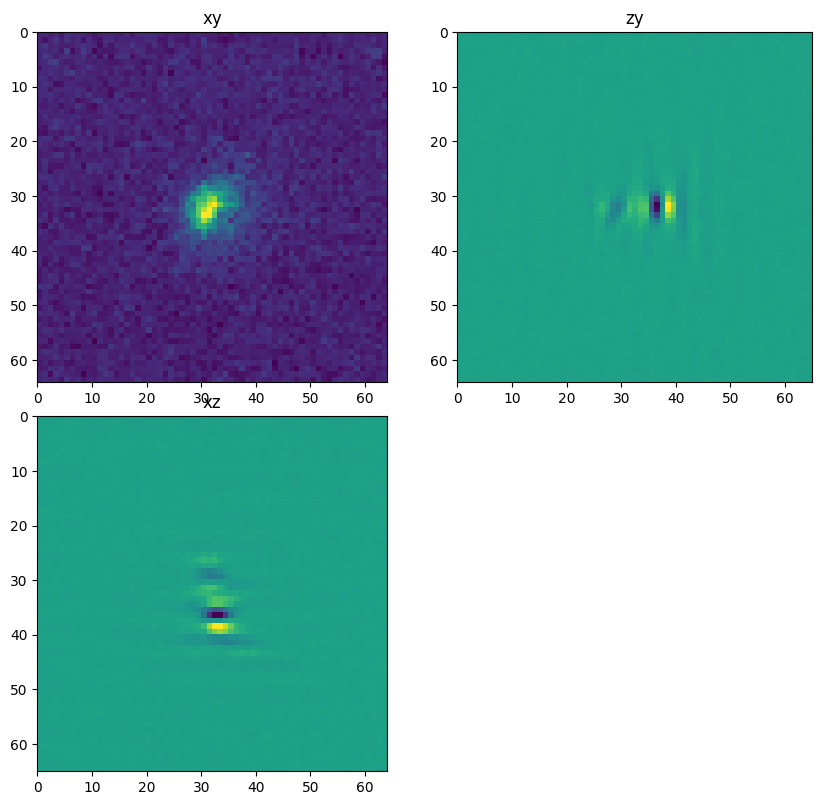

In [42]:
n=1
band1 = sep[n*nz:(n+1)*nz,:,:]
n=2
band2 = sep[n*nz:(n+1)*nz,:,:]

band = band1.real + 1j*band2.imag

real = np.fft.irfftn(band, s=original_shape)

fig = show_xyz_slice(real, xc, yc, zc)